In [1]:
def user():
    '''Function that asks for the user for values that will be used throughout the rest of the program.'''
    population = int(input('What is the approximate population size of your city/town? ')) #Asks the user for the total population (number of individuals who can become suseptible.)
    daily_rate = int(input('What was the daily number of cases in your area? ')) #Asks the user for the the number of cases (Thus the number of infectives in the first year)
    num_gen= int(input('The assumed generation time is 10 days, how many Generation do you want to go through: ')) #The number of generations indicated how many data points the user wants.
    
    high_or_low = input('Would you like the transmission rate to be a high or low estimate? ') #Asks the user for what type of estimate they would like
    if len(high_or_low)==3: #if the user wants a low estimate
        low_estimate={'England':0.8, 'Northen Ireland':0.9, 'Scotland':0.8, 'Wales':0.8} #low estimates for UK values
        country = input('What country in the UK is your town or city? ') #answer used to select from the dictionary
        B = low_estimate[country] #pulls the estimate from the dictionary
        return B, country, num_gen, daily_rate, population
    else:
        high_estimate={'England':1.0, 'Northen Ireland':1.1, 'Scotland':1.0, 'Wales':1.0} #high estimates for UK values
        country = input('What country in the UK is your town or city? ') #answer used to select from the dictionary
        B = high_estimate[country] #pulls the estimate from the dictionary
        return B, country, num_gen, daily_rate, population

In [7]:
def calculations():
    '''Function to Calculate the number of individuals who gain immunity each generation without the inclusion of a vaccine.'''
    B, country, num_gen, daily_rate, population = user()
    print('The transmission rate for {} is {}. '.format(country, B)) #informs the user of the information they did not directly imput
    mr= 0.036 #the UK death rate for the corona virus
    zero_death = (daily_rate*mr) #number of individuals that died from the cases the user provided
    zero_immunity = daily_rate - zero_death #number of individuals that gained immunity from the cases the user provides
    length= int(num_gen) + 1 #the number of generations the user provided +1 so that the for program goes through the required amount of times
    gen = range(1, length) #list of all generations
    total_cases = [daily_rate] #a list of all the cases
    total_immunity=[zero_immunity] #list of number of individuals immune each generation
    total_death = [zero_death] #list of number of individuals died each generation
    total_generation= [0] #creates a list of the generation numbers
    lisha_list = [zero_immunity] #Sum of total immunity each generation
    for t in gen: #Sequences through all generations
        total_generation.append(t) #adds a number to the total generation
        sum_cases = sum(total_cases) #sums all the number of cases
        if sum_cases>=population: #if total number of cases is larger than the population or there are no more cases
            print('All the population has been processed.')
            R = sum(total_immunity) #number of people who recovered
            I= daily_rate #number of people who are infectious
            portion_infected= I/population #the portion of the individuals who 
            not_in_population = (R + sum(total_death)) #sum of the people no longer suseptible either immune or dead
            S = (population-not_in_population) #removes those who are not suseptible from the population
            portion_S = (S/population) #portion of the people suseptible
            new_cases = portion_S*I*B #number of new cases: portion of individuals in the population who are suseptible * infected (contagious) * transmission rate
            total_cases.append(new_cases) #adds to the total number of cases
            death =  (new_cases)*0.036 #portion of those infected who died
            total_death.append(death) #adds to the total number of deaths
            immunity = new_cases - death #individuals who are immune that generation
            total_immunity.append(immunity) #adds to the total number of immune
            print('In generation {}, there were {:.0f} cases, after an increase of {:.0f}. {:.0f} people became immune, and {:.0f} died.'.format(t, new_cases, 
                                                                                                                               daily_rate, immunity, death))
            print('After {} generation(s) of COVID, {:.0f} number of people will be immune.'.format(t,sum(total_immunity))) 
            daily_rate = new_cases
            print(' ')
            lisha_list.append(sum(total_immunity))
            break
           
        else:
            R = sum(total_immunity) #number of people who recovered
            I= daily_rate #number of people who are infectious
            portion_infected= I/population #the portion of the individuals who 
            not_in_population = (R + sum(total_death)) #sum of the people no longer suseptible either immune or dead
            S = (population-not_in_population) #removes those who are not suseptible from the population
            portion_S = (S/population) #portion of the people suseptible
            new_cases = portion_S*I*B #number of new cases: portion of individuals in the population who are suseptible * infected (contagious) * transmission rate
            total_cases.append(new_cases) #adds to the total number of cases
            death =  (new_cases)*0.036 #portion of those infected who died
            if death<1:
                total_death.append(1) #adds to the total number of deaths
            else:
                total_death.append(death) #adds to the total number of deaths
            immunity = new_cases - death #individuals who are immune that generation
            if immunity<1:
                    total_immunity.append(1)
            else:
                total_immunity.append(immunity) #adds to the total number of immune
            print('In generation {}, there were {:.0f} cases, after an increase of {:.0f}. {:.0f} people became immune, and {:.0f} died.'.format(t, new_cases, 
                                                                                                                               daily_rate, immunity, death))
            print('After {} generation(s) of COVID, {:.0f} number of people will be immune.'.format(t,sum(total_immunity))) 
            daily_rate = new_cases
            print(' ')
            lisha_list.append(sum(total_immunity))
    
    return total_cases, total_immunity, total_death, total_generation, lisha_list


In [3]:
def table():
    '''Function to display and save to a file the data to be displayed in a graph'''
    total_cases, total_immunity, total_death, total_generation, lisha_list = calculations()
    #imports a software libraries needed to complete the program
    import pandas as pd
    import numpy as np
    
    #creates a dictionary of the number of generations vs the sum of the individuals with immunity
    data = {
    'Number of Generations': total_generation,
    'Number of individuals with immunity': lisha_list
        }
    
    #prints the information in data to a table
    table = pd.DataFrame(data)
    print(table)
    numpy_array = table.to_numpy()
    print(' ')
    
    decide= input('Do you want to save the report to a file? Enter yes or no: ') #ask if they want to save a file
    if len(decide)==3: #If they input yes
        #currently only input that works is Gen
        print('Your file name will be "Gen"') #user needs to provide a file name
        
        how = input('How would you like your file to be opened? Enter append or write: ') #ask how they want the data to be saved
        confirm_how = input('Confirm editing format with yes or no: ') #ask for confirmation
        if len(confirm_how)==2:#if enter no
            how = input('How would you like your file to be opened? Enter append or write: ') #allowed to enter again
        if len(how)== 5: #write the following into the provided file
            file = open('Gen', 'w')
            np.savetxt('Gen' , numpy_array, fmt = "%d")
            file.close()
            print('The program is complete.')
        else: #append the following into the provided file
            file= open('Gen', 'a')
            np.savetxt('Gen' , numpy_array, fmt = "%d")
            file.close()
            print('The program is complete.')
                    
    else: #if the user doesn't want to save a file.
        print('Okay, the program is complete.')

In [4]:
def graph():
    '''Function which prints a graph of established data'''
    import pandas as pd
    table()
    tdf= pd.read_csv("Gen",sep=" ") #reads file to collect the data
    tdf.shape
    tdf=pd.read_csv("Gen",sep=" ",names=["Gen time", "Immunity"]) #creates headers for the graph
    tdf.head()
    tdf.plot(x="Gen time",y="Immunity") #plots the data

What is the approximate population size of your city/town? 5000000
What was the daily number of cases in your area? 754
The assumed generation time is 10 days, how many Generation do you want to go through: 600
Would you like the transmission rate to be a high or low estimate? high
What country in the UK is your town or city? Scotland
The transmission rate for Scotland is 1.0. 
753.8862968
In generation 1, there were 754 cases, after an increase of 754. 727 people became immune, and 27 died.
After 1 generation(s) of COVID, 1454 number of people will be immune.
 
753.6589418367419
In generation 2, there were 754 cases, after an increase of 754. 727 people became immune, and 27 died.
After 2 generation(s) of COVID, 2180 number of people will be immune.
 
753.3180550784485
In generation 3, there were 753 cases, after an increase of 754. 726 people became immune, and 27 died.
After 3 generation(s) of COVID, 2906 number of people will be immune.
 
752.8638248878988
In generation 4, there we

1.8908142521462212
In generation 422, there were 2 cases, after an increase of 2. 2 people became immune, and 0 died.
After 422 generation(s) of COVID, 83361 number of people will be immune.
 
1.8580745509050307
In generation 423, there were 2 cases, after an increase of 2. 2 people became immune, and 0 died.
After 423 generation(s) of COVID, 83363 number of people will be immune.
 
1.8259007047167592
In generation 424, there were 2 cases, after an increase of 2. 2 people became immune, and 0 died.
After 424 generation(s) of COVID, 83365 number of people will be immune.
 
1.7942829629731363
In generation 425, there were 2 cases, after an increase of 2. 2 people became immune, and 0 died.
After 425 generation(s) of COVID, 83367 number of people will be immune.
 
1.7632117421868987
In generation 426, there were 2 cases, after an increase of 2. 2 people became immune, and 0 died.
After 426 generation(s) of COVID, 83368 number of people will be immune.
 
1.7326776231563907
In generation 42

Do you want to save the report to a file? Enter yes or no: no
Okay, the program is complete.


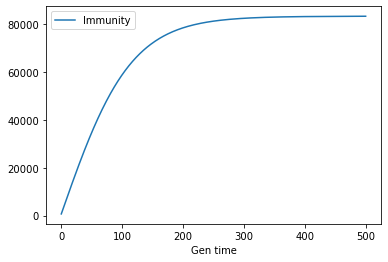

In [8]:
graph()